In [313]:
# import statements and globals
import networkx as nx
import queue
import math
import functools as ft
import matplotlib.pyplot as plt

N = 128 # use this as the size of graphs in all experiments

In [314]:
# will give numbers 0 .. n in "bisecting" order, for example: 0, 4, 2, 6, 1, 5, 3, 7
def bisect_series(n):
    if n < 2 or not ((n & (n - 1)) == 0): raise Exception('n must be a power of 2, (n is ' + str(n) + ')') #http://code.activestate.com/recipes/577514-chek-if-a-number-is-a-power-of-two/
    yield 0
    yield n//2
    if not n > 2: return
    q = queue.Queue()
    q.put((n//4, 0, n//2)) # A tuple contains the next number to add, and the two numbers that were outside of it when added
    while not q.empty():
        t = q.get()
        yield t[0]
        yield (t[0] + n//2)%n
        if t[0] - t[1] > 1:
            q.put((((t[0] + t[1])//2), t[1], t[0]))
            q.put((((t[0] + t[2])//2), t[0], t[2]))

# wrapper for graph assortativity to avoid message in d-regular graph
def assort(graph):
    first_degree = graph.degree(list(graph.nodes)[0])
    if all(graph.degree(v) == first_degree for v in list(graph.nodes)): return 1.0
    return nx.degree_assortativity_coefficient(graph)

def fi(graph, vertex):
    return ft.reduce(lambda x, y: x + y, [graph.degree(nbr) for nbr in vertex])/len(vertex)**2

def afi(graph):
    return ft.reduce(lambda x, y: x + y, [fi(graph, graph[v]) for v in graph.nodes])/len(graph.nodes)

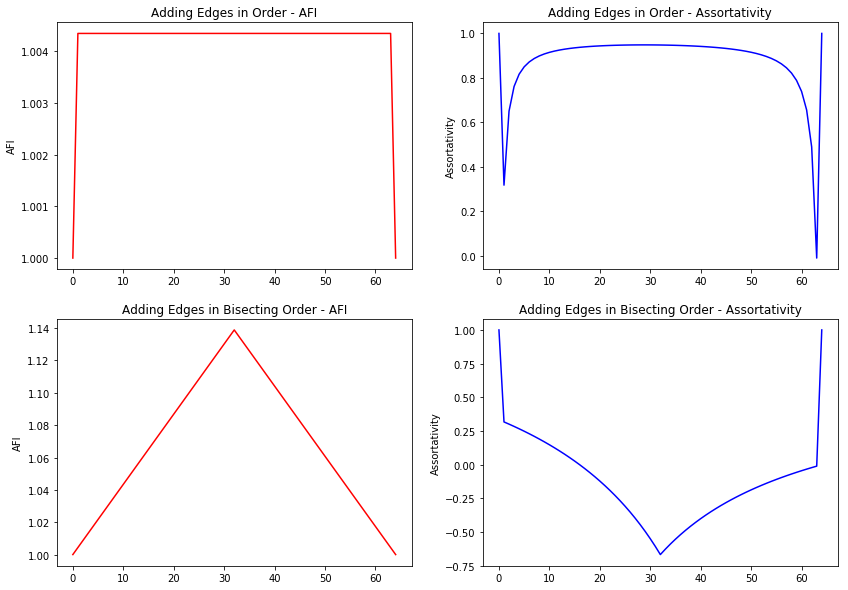

In [315]:
# This experiment will start with a cycle, then add "diameters", so it progresses from a 2-regular graph to a 3-regular graph
g1 = nx.Graph()
g2 = nx.Graph()

for i in range(N):
    g1.add_node(i)
    g2.add_node(i)
    
for i in range(N):
    g1.add_edge(i, (i+1)%N)
    g2.add_edge(i, (i+1)%N)
    
afis1 = [afi(g1)]
assorts1 = [assort(g1)]
afis2 = [afi(g2)]
assorts2 = [assort(g2)]

for i in range(N//2):
    g1.add_edge(i, i + N//2)
    afis1.append(afi(g1))
    assorts1.append(assort(g1))
    
for i in bisect_series(N//2):
    if not i + N//2 in g2[i]:
        g2.add_edge(i, i + N//2)
        afis2.append(afi(g2))
        assorts2.append(assort(g2))

plt.figure(figsize=(14, 10))
        
plt.subplot(2, 2, 1)
plt.title('Adding Edges in Order - AFI')
plt.plot(afis1, 'r')
plt.ylabel('AFI')
plt.subplot(2, 2, 2)
plt.title('Adding Edges in Order - Assortativity')
plt.plot(assorts1, 'b')
plt.ylabel('Assortativity')

plt.subplot(2, 2, 3)
plt.title('Adding Edges in Bisecting Order - AFI')
plt.plot(afis2, 'r')
plt.ylabel('AFI')
plt.subplot(2, 2, 4)
plt.title('Adding Edges in Bisecting Order - Assortativity')
plt.plot(assorts2, 'b')
plt.ylabel('Assortativity')

plt.show()
